<a href="https://colab.research.google.com/github/ronen-halevy/ai-notebooks/blob/main/object-detection/Object_Detection_Inference_With_TF_Hub_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

 - This page demoonstrates object detection using a TF HUB pre-trained model.
The model can be selected from a list of models, all trained with MS-COCO dataset.

- The detections are annotated with bounding boxes and text, produced by python code.

- In an example which follows, annotations are produced by `Object Detection API`.


## Import Packages

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO


import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

print(tf.__version__)

print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

2.7.0
The following GPU devices are available: 


## Select A Model From TensorFlow Hub

#####About TensorFlow Hub:
- TensorFlow Hub is a repository of trained machine learning models ready for fine-tuning and deployable anywhere
- Select from a list of TF HUB Detection Models

#####About Below Selection Listed TF Hub Models:

 - All models were trained with MS-COCO with 80 class categories.

- Constraints on Input Images:
 - All models accepts any image size.
 - The input for all models is a tensor with shape [1, height, width, 3] 
 - Values in range [0, 255]
 - Data type tf.uint8 (Numpy also works, can be float)
 - All models don't support batching






#####The Models List:

In [ ]:
ALL_MODELS = {
'CenterNet HourGlass104 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512/1',
'CenterNet HourGlass104 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1',
'CenterNet HourGlass104 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024/1',
'CenterNet HourGlass104 Keypoints 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024_kpts/1',
'CenterNet Resnet50 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512/1',
'CenterNet Resnet50 V1 FPN Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512_kpts/1',
'CenterNet Resnet101 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet101v1_fpn_512x512/1',
'CenterNet Resnet50 V2 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512/1',
'CenterNet Resnet50 V2 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512_kpts/1',
'EfficientDet D0 512x512' : 'https://tfhub.dev/tensorflow/efficientdet/d0/1',
'EfficientDet D1 640x640' : 'https://tfhub.dev/tensorflow/efficientdet/d1/1',
'EfficientDet D2 768x768' : 'https://tfhub.dev/tensorflow/efficientdet/d2/1',
'EfficientDet D3 896x896' : 'https://tfhub.dev/tensorflow/efficientdet/d3/1',
'EfficientDet D4 1024x1024' : 'https://tfhub.dev/tensorflow/efficientdet/d4/1',
'EfficientDet D5 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d5/1',
'EfficientDet D6 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d6/1',
'EfficientDet D7 1536x1536' : 'https://tfhub.dev/tensorflow/efficientdet/d7/1',
'SSD MobileNet v2 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2',
'SSD MobileNet V1 FPN 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v1/fpn_640x640/1',
'SSD MobileNet V2 FPNLite 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_320x320/1',
'SSD MobileNet V2 FPNLite 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1',
'SSD ResNet50 V1 FPN 640x640 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_640x640/1',
'SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_1024x1024/1',
'SSD ResNet101 V1 FPN 640x640 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_640x640/1',
'SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_1024x1024/1',
'SSD ResNet152 V1 FPN 640x640 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_640x640/1',
'SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_1024x1024/1',
'Faster R-CNN ResNet50 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1',
'Faster R-CNN ResNet50 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_1024x1024/1',
'Faster R-CNN ResNet50 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_800x1333/1',
'Faster R-CNN ResNet101 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_640x640/1',
'Faster R-CNN ResNet101 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_1024x1024/1',
'Faster R-CNN ResNet101 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_800x1333/1',
'Faster R-CNN ResNet152 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_640x640/1',
'Faster R-CNN ResNet152 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_1024x1024/1',
'Faster R-CNN ResNet152 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_800x1333/1',
'Faster R-CNN Inception ResNet V2 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1',
'Faster R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1',
'Mask R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'
}



In [ ]:
#@title Model Selection { display-mode: "form", run: "auto" }
model_display_name = 'CenterNet HourGlass104 512x512' # @param ['CenterNet HourGlass104 512x512','CenterNet HourGlass104 Keypoints 512x512','CenterNet HourGlass104 1024x1024','CenterNet HourGlass104 Keypoints 1024x1024','CenterNet Resnet50 V1 FPN 512x512','CenterNet Resnet50 V1 FPN Keypoints 512x512','CenterNet Resnet101 V1 FPN 512x512','CenterNet Resnet50 V2 512x512','CenterNet Resnet50 V2 Keypoints 512x512','EfficientDet D0 512x512','EfficientDet D1 640x640','EfficientDet D2 768x768','EfficientDet D3 896x896','EfficientDet D4 1024x1024','EfficientDet D5 1280x1280','EfficientDet D6 1280x1280','EfficientDet D7 1536x1536','SSD MobileNet v2 320x320','SSD MobileNet V1 FPN 640x640','SSD MobileNet V2 FPNLite 320x320','SSD MobileNet V2 FPNLite 640x640','SSD ResNet50 V1 FPN 640x640 (RetinaNet50)','SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)','SSD ResNet101 V1 FPN 640x640 (RetinaNet101)','SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)','SSD ResNet152 V1 FPN 640x640 (RetinaNet152)','SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)','Faster R-CNN ResNet50 V1 640x640','Faster R-CNN ResNet50 V1 1024x1024','Faster R-CNN ResNet50 V1 800x1333','Faster R-CNN ResNet101 V1 640x640','Faster R-CNN ResNet101 V1 1024x1024','Faster R-CNN ResNet101 V1 800x1333','Faster R-CNN ResNet152 V1 640x640','Faster R-CNN ResNet152 V1 1024x1024','Faster R-CNN ResNet152 V1 800x1333','Faster R-CNN Inception ResNet V2 640x640','Faster R-CNN Inception ResNet V2 1024x1024','Mask R-CNN Inception ResNet V2 1024x1024']
model_handle = ALL_MODELS[model_display_name]
# model_handle ='https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1' # ronen!!
print('Selected model:'+ model_display_name)
print('Model Handle at TensorFlow Hub: {}'.format(model_handle))

Selected model:CenterNet HourGlass104 512x512
Model Handle at TensorFlow Hub: https://tfhub.dev/tensorflow/centernet/hourglass_512x512/1


##Load the Selected Model

In [ ]:
hub_model = hub.load(model_handle)

## Detector Function

Run Detector with the downloaded image.

The Detector returns a dictionary which contains the following values:


**num_detections**: a tf.int tensor with only one value, the number of detections [N].

**detection_boxes**: a tf.float32 tensor of shape [N, 4] containing bounding box coordinates in the following order: [ymin, xmin, ymax, xmax].

**detection_classes**: a tf.int tensor of shape [N] containing detection class index from the label file.

**detection_scores**: a tf.float32 tensor of shape [N] containing detection scores.

**raw_detection_boxes**: a tf.float32 tensor of shape [1, M, 4] containing decoded detection boxes without Non-Max suppression. M is the number of raw detections.

**raw_detection_scores:** a tf.float32 tensor of shape [1, M, 90] and contains class score logits for raw detection boxes. M is the number of raw detections.

**detection_anchor_indices**: a tf.float32 tensor of shape [N] and contains the anchor indices of the detections after NMS.

**detection_multiclass_scores**: a tf.float32 tensor of shape [1, N, 90] and contains class score distribution (including background) for detection boxes in the image including background class.



In [ ]:
def run_detector(detector, img):
  result = detector(img)
  detections = {key:value.numpy() for key,value in result.items()}

  print("Found %d objects." % len(detections["detection_scores"]))
  return detections



##Annotations Functions

Draw: 

- Detections Bounding Boxes
- Categorized Class Names Text Annotations
- Detection Scores Text Annotations

####Helper Functions (1): Produce Label Map Table
**Background: The need for a label map table**
This example page demonstrates `by hand` detection annotations, i.e. not by the dedicated TensorFlow `Object Detection API` but by using a plane python code.

The detected objects are going to be annotated by their `class name` and a `score` figure.

The detections result objects of TF HUB models used in this example, do not contain the corresponding categorized class lables, but only class ids.

Accordingly, we need to produce a label map table for the coco dataset.

**This is how we will do it**

There might be more than one way to produce a label map table for coco.

We will do it in the following way:

1. Clone the tensorflow models repository - this repo holds file `mscoco_label_map.pbtxt`
2. Extract the label table from `mscoco_label_map.pbtxt`.



##### Clone the tensorflow models repository

In [ ]:
!git clone --depth 1 https://github.com/tensorflow/models

fatal: destination path 'models' already exists and is not an empty directory.


#####Extract the label table from `mscoco_label_map.pbtxt`


The method `read_label_map` extracts the 


In [ ]:
PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'
def read_label_map(label_map_path):
    item_id = None
    item_name = None
    items = {}
    map_table = []
    with open(label_map_path, "r") as file:
        for line in file:
            line.replace(" ", "")
            if line == "item{":
                pass
            elif line == "}":
                pass
            elif "id" in line:
                item_id = int(line.split(":", 1)[1].strip())
            elif "display_name" in line:
                item_name = line.split(":", 1)[1].replace('"', "").strip()
                map_table.append(item_name)

            if item_id is not None and item_name is not None:
                items[str(item_id)] = item_name
                item_id = None
                item_name = None

    return items


In [ ]:
label_map = read_label_map(PATH_TO_LABELS)

In [ ]:
#!cat ./models/research/object_detection/data/mscoco_label_map.pbtxt

####Helper Functions (2): Drawing Utilities


In [ ]:
def draw_bounding_box(image, ymin, xmin, ymax, xmax, color, thickness=3):
  draw = ImageDraw.Draw(image)
  draw.line([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin),
             (xmin, ymin)],
            width=thickness,
            fill=color)
  return image


def draw_text_on_bounding_box(image, ymin, xmin, color, display_str_list=(), font_size=30):
  draw = ImageDraw.Draw(image)
  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",  font_size)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  text_heights = [font.getsize(string)[1] for string in display_str_list]
  text_margin_factor = 0.05
  total_text_height = (1 + 2 * text_margin_factor) * sum(text_heights)
  
  if ymin > total_text_height:
    text_bottom = ymin
  else:
    text_bottom = ymin + total_text_height

  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    text_margin = np.ceil(text_margin_factor * text_height)
    draw.rectangle([(xmin, text_bottom - text_height - 2 * text_margin),
                    (xmin + text_width, text_bottom)],
                   fill=color)
    draw.text((xmin + text_margin, text_bottom - text_height - text_margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * text_margin
    return image

def annotate_detection(image_pil, bbox, class_name, score, font_size=30):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  im_width, im_height = image_pil.size
  ymin, xmin, ymax, xmax = tuple(bbox * [im_height, im_width, im_height, im_width] ) 
  colors = list(ImageColor.colormap.values())
  color = colors[hash(class_name) % len(colors)]

  image_pil = draw_bounding_box(image_pil,
                                    ymin, 
                                    xmin, 
                                    ymax, 
                                    xmax,
                                    color,
                                    thickness=4)
    

  display_str = "{}: {}%".format(class_name,
                                     int(100 * score)) 
  image_pil = draw_text_on_bounding_box(
                                  image_pil,
                                  ymin, 
                                  xmin,
                                  color,
                                  display_str_list=[display_str], font_size=font_size)

  return image_pil

def annotate_detections(image, class_names, bboxes, scores, score_thresh, max_detections, font_size=30):
  image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
  num_score_skips = 0
  num_annotated = 0
  for idx, (bbox, class_name, score) in enumerate(zip(bboxes, class_names, scores)):
    if (score < score_thresh):
      num_score_skips +=1
      continue 
    if (idx > max_detections):
      break
    num_annotated +=1
    image_pil = annotate_detection(image_pil, bbox, class_name, score, font_size)

  
  return image_pil, num_annotated, num_score_skips


##Draw Annotate And Dispaly


## Load Target Image

####Select Target Image

In [ ]:
def download_image(image_url):
  response = urlopen(image_url)
  image = response.read()
  image = BytesIO(image)
  image = Image.open(image)
  image = np.array(image)
  img  = tf.image.convert_image_dtype(image, tf.uint8)[tf.newaxis, ...]
  return img



In [ ]:
IMAGES_FOR_TEST = {
  # By Marc Ryckaert, Source: https://commons.wikimedia.org/wiki/File:Seagulls_Miami_Beach_R01.jpg
  'Seagulls': 'https://upload.wikimedia.org/wikipedia/commons/2/21/Seagulls_Miami_Beach_R01.jpg',
  # By Mostafa Meraji, source: https://commons.wikimedia.org/wiki/File:Animals_of_Iran_06.jpg  
  'Flying Birds': 'https://upload.wikimedia.org/wikipedia/commons/f/fb/Animals_of_Iran_06.jpg',
  # By Touhid biplob, Source: https://commons.wikimedia.org/wiki/File:Running_zebra.jpg
  'Zebras': 'https://upload.wikimedia.org/wikipedia/commons/8/8f/Running_zebra.jpg',
  # By Chris Allen, Source: https://commons.wikimedia.org/wiki/File:Company_housing,_Street_-_geograph.org.uk_-_3019550.jpg
  'Street': 'https://upload.wikimedia.org/wikipedia/commons/2/20/Company_housing%2C_Street_-_geograph.org.uk_-_3019550.jpg'
}


##Execute Detection Session


####Set Execution Params

In [ ]:
#@title Set Execution Params{ run: "auto" }
selected_image = 'Seagulls' #@param ['Seagulls', 'Flying Birds', 'Zebras', 'Street']  { run: "auto" }
image_path = IMAGES_FOR_TEST[selected_image]
max_detections = 50 #@param {type:"integer"}

score_thresh = 20 #@param {type:"slider", min:0, max:100, step:1}

font_size =  30#@param {type:"slider", min:10, max:100, step:5}{ run: "auto" }


####Exceute Detection

Found 1 objects.
num_detections: [100.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


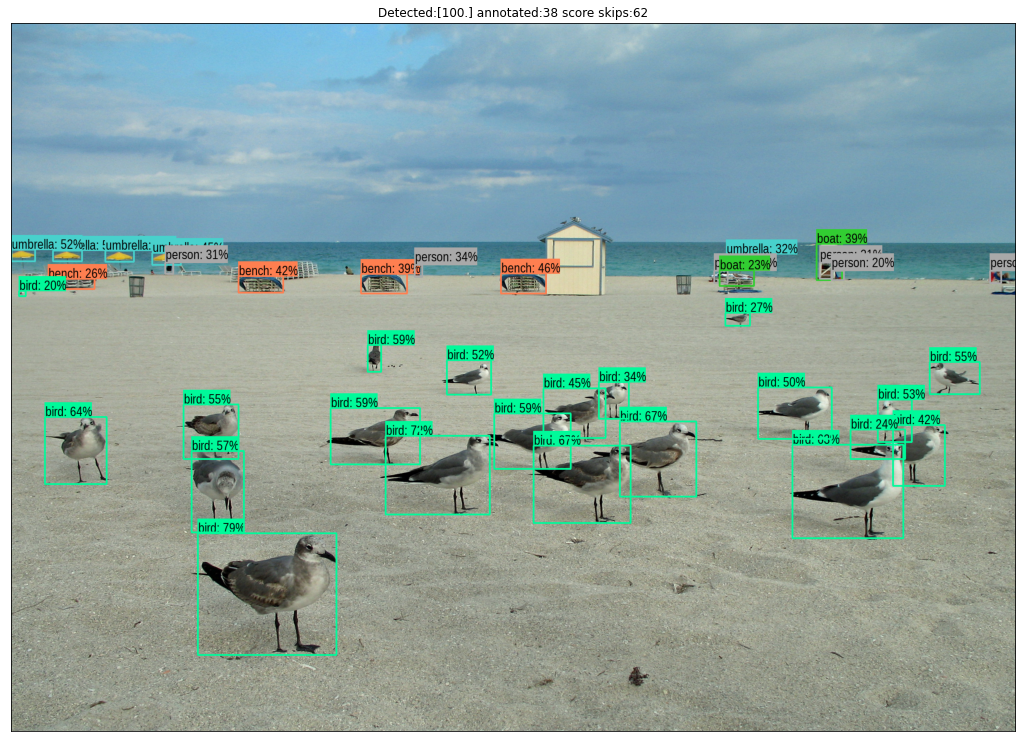

In [ ]:
img = download_image(image_path)
detections = run_detector(hub_model, img)
num_detections = detections['num_detections']
print('num_detections: {}'.format(num_detections))
class_id = detections['detection_classes'].squeeze()
class_names = [label_map[str(int(id))] for id in class_id]
bboxes = detections['detection_boxes'].squeeze()
scores = detections['detection_scores'].squeeze()

annotated_image, num_annotated, num_score_skips = annotate_detections(img.numpy().squeeze(), 
                                                                      class_names, 
                                                                      bboxes, scores, 
                                                                      score_thresh/100, 
                                                                      max_detections,
                                                                      font_size)

fig = plt.figure(figsize=(18,27))
plt.yticks([])
plt.xticks([])
ax = fig.add_subplot(1, 1, 1)
ax.imshow(annotated_image)

ax.title.set_text('Detected:{detected} annotated:{annotated} score skips:{num_score_skips}'.format(detected=num_detections, 
                                                                                              annotated=num_annotated, 
                                                                                                   num_score_skips=num_score_skips))


##More Execution Outputs

**Flying Birds**

By Mostafa Meraji

Source https://commons.wikimedia.org/wiki/File:Animals_of_Iran_06.jpg

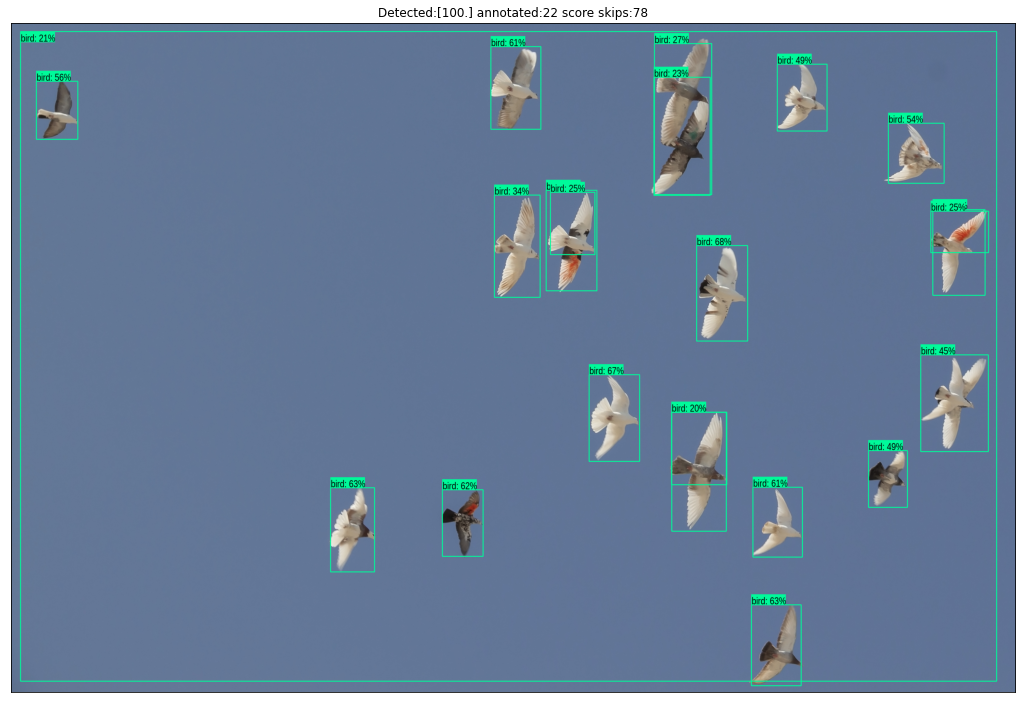

**Street**

By Chris Allen

Source: https://commons.wikimedia.org/wiki/File:Company_housing,_Street_-_geograph.org.uk_-_3019550.jpg


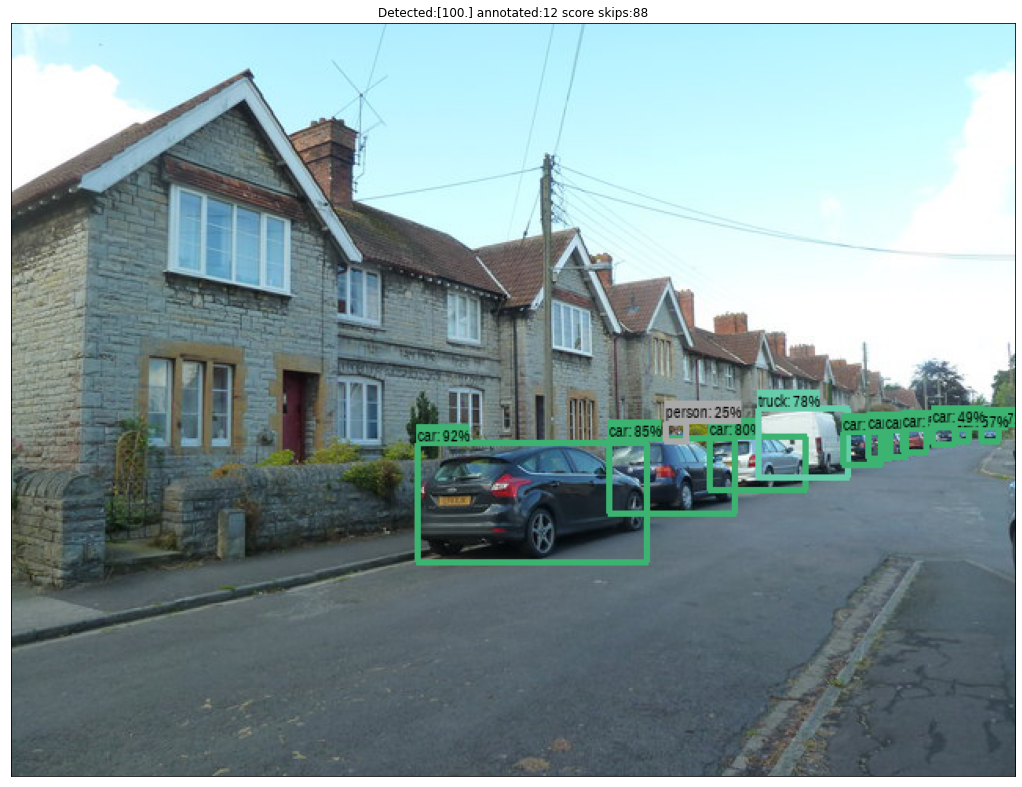